In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("2D_supervised.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      300 non-null    float64
 1   x2      300 non-null    float64
 2   label   300 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 7.2 KB


In [4]:
data.head()

,x1,x2,label
0,0.743457,-0.318305,1
1,2.177712,-0.126926,1
2,-0.210072,0.452664,1
3,0.837597,0.335201,0
4,1.184558,-0.504574,1


In [5]:
data.isnull().sum()

x1       0
x2       0
label    0
dtype: int64

In [6]:
data.describe()

,x1,x2,label
count,300.000000,300.000000,300.000000
mean,0.501238,0.259587,0.500000
std,0.884732,0.515430,0.500835
min,-1.349889,-0.782448,0.000000
25%,-0.135104,-0.179007,0.000000
50%,0.471473,0.253940,0.500000
75%,1.104199,0.680961,1.000000
max,2.409575,1.372129,1.000000


In [7]:
data.duplicated().sum()

np.int64(0)

In [8]:
data.dropna()

,x1,x2,label
0,0.743457,-0.318305,1
1,2.177712,-0.126926,1
2,-0.210072,0.452664,1
3,0.837597,0.335201,0
4,1.184558,-0.504574,1
...,...,...,...
295,0.426668,-0.125400,1
296,0.266669,1.156610,0
297,-0.684461,0.882375,0
298,1.589833,-0.082742,1


In [9]:
numeric_cols = data.select_dtypes(include='number').columns

In [10]:
numeric_cols

Index(['x1', 'x2', 'label'], dtype='object')

In [11]:
for cols in numeric_cols:
        data[cols+"_Norm"] = (data[cols] - data[cols].min()) / (data[cols].max() - data[cols].min())

data.head()

,x1,x2,label,x1_Norm,x2_Norm,label_Norm
0,0.743457,-0.318305,1,0.556820,0.215422,1.0
1,2.177712,-0.126926,1,0.938325,0.304246,1.0
2,-0.210072,0.452664,1,0.303186,0.573250,1.0
3,0.837597,0.335201,0,0.581861,0.518732,0.0
4,1.184558,-0.504574,1,0.674151,0.128969,1.0


In [13]:
if 'x1' in data.columns:
        data['x1_bin'] = pd.cut(data['x1'], bins=3, labels=['good','better' , 'best'])
        print(data[['x1', 'x1_bin']].head())

         x1  x1_bin
0  0.743457  better
1  2.177712    best
2 -0.210072    good
3  0.837597  better
4  1.184558    best


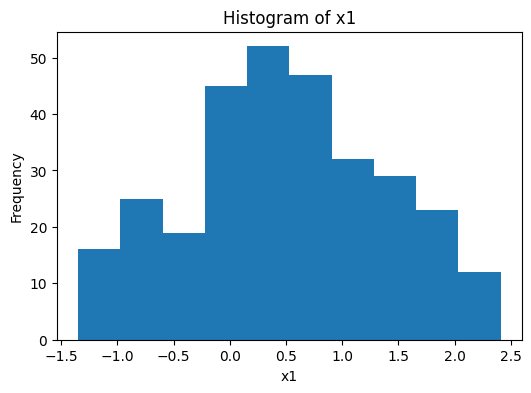

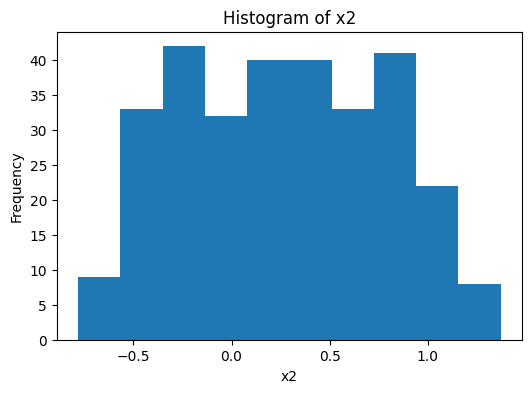

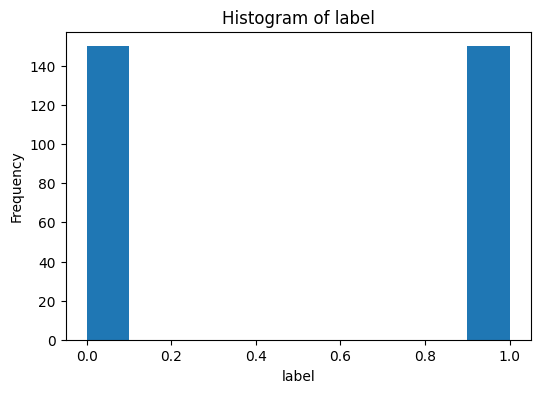

In [15]:
import matplotlib.pyplot as plt

for cols in numeric_cols:
        plt.figure(figsize=(6, 4))
        plt.hist(data[cols], bins= 10)
        plt.xlabel(cols)
        plt.ylabel("Frequency")
        plt.title("Histogram of " + cols)


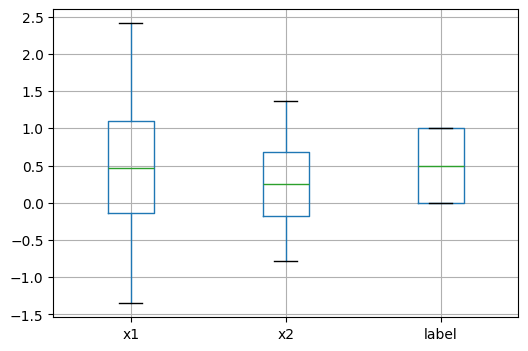

In [16]:
plt.figure(figsize=(6,4))
data[numeric_cols].boxplot()
plt.show()


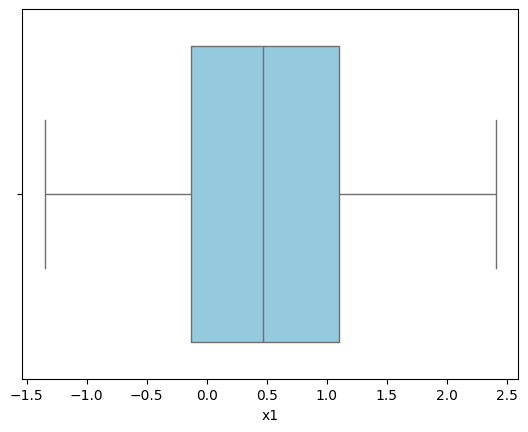

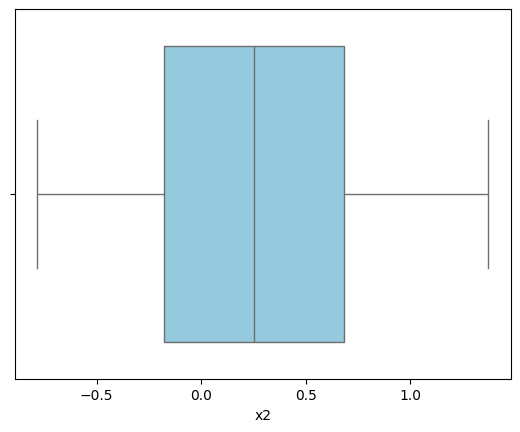

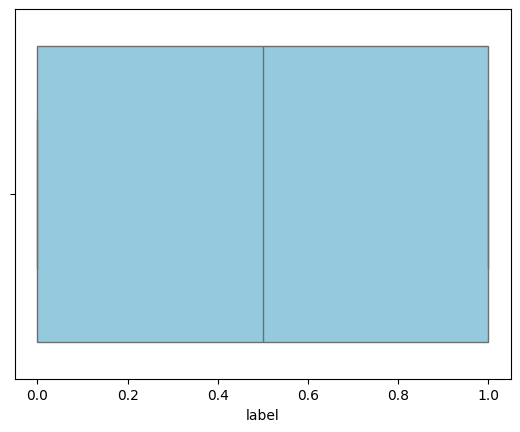

In [17]:
import seaborn as sns

for cols in numeric_cols:
        sns.boxplot(x = data[cols], color = 'skyblue')
        plt.show()

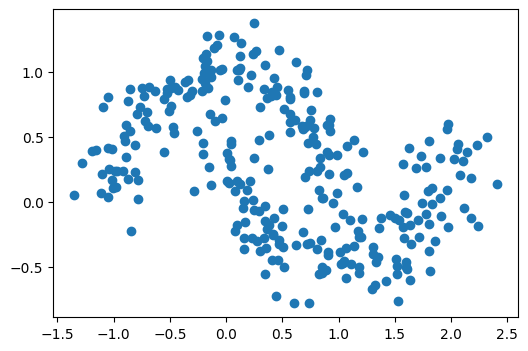

In [18]:
plt.figure(figsize=(6,4))

plt.scatter(data['x1'], data['x2'])
plt.show()

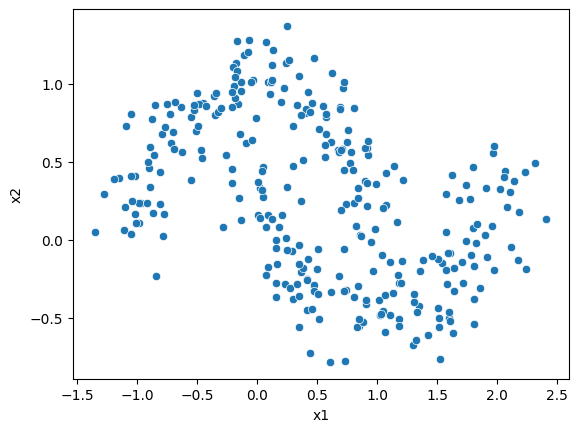

In [19]:
sns.scatterplot(data, x = 'x1', y = 'x2')
plt.show()

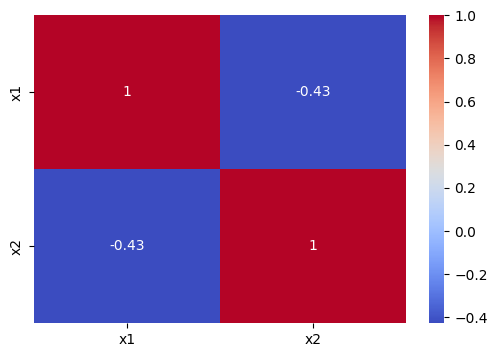

In [23]:
plt.figure(figsize=(6,4))
sns.heatmap(data[['x1', 'x2']].corr(), annot=True, cmap='coolwarm')
plt.show()

Empty DataFrame
Columns: [x1, x2, label, x1_Norm, x2_Norm, label_Norm, x1_bin]
Index: []


C:\Users\admin\AppData\Local\Temp\ipykernel_4800\3975910675.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


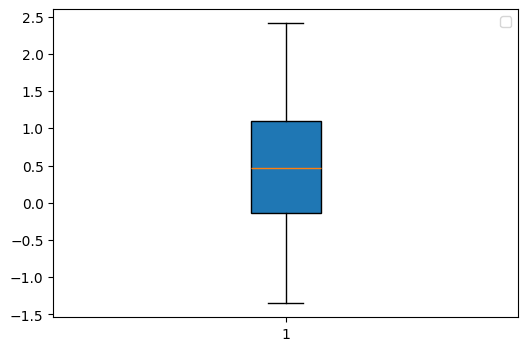

Empty DataFrame
Columns: [x1, x2, label, x1_Norm, x2_Norm, label_Norm, x1_bin]
Index: []


C:\Users\admin\AppData\Local\Temp\ipykernel_4800\3975910675.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


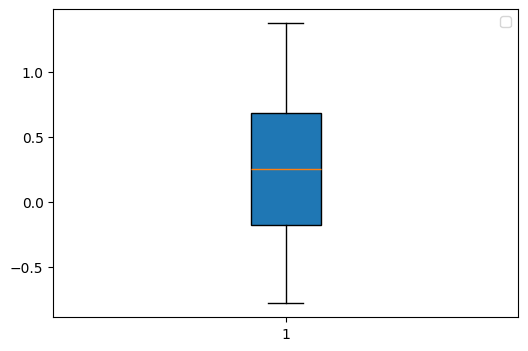

Empty DataFrame
Columns: [x1, x2, label, x1_Norm, x2_Norm, label_Norm, x1_bin]
Index: []


C:\Users\admin\AppData\Local\Temp\ipykernel_4800\3975910675.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


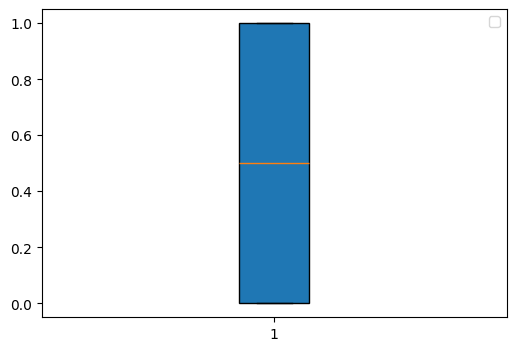

In [ ]:
for cols in numeric_cols:
        Q1 = data[cols].quantile(0.25)
        Q3 = data[cols].quantile(0.75)

        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = data[(data[cols] < lower_bound) | (data[cols] > upper_bound)]
        print(outliers)
        plt.figure(figsize=(6,4))
        plt.boxplot(data[cols], patch_artist=True, showfliers=False)
        plt.show()


In [ ]:
histogram
boxplot
scatterplot 
heatmap